In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 분석 목적
- **부모의 학력은 아이의 학업 성취도에 영향을 미치는가?**

## 1. 데이터 이해하기

In [2]:
exam_df = pd.read_csv("./StudentsPerformance.csv")
exam_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### 각 column의 데이터 타입 확인

In [3]:
exam_df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

**8개의 열 중 5개는 문자형 데이터, 나머지는 3개는 수치형 데이터**  


## 2. 데이터 전체적으로 살펴보기

### 2-1. 수치형 데이터 요약보기

In [4]:
exam_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 2-2. 상관계수 확인

In [5]:
exam_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


**두 변수 사이의 값들이 1에 가깝기 때문에 양의 상관관계를 가지고 있다.**  
**즉, 어느 한 점수가 높다면 다른 점수도 높을 가능성이 크다.**

### 2-3. 결측치 확인하기

In [6]:
exam_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**결측치 없음**

## 3. 데이터 개별 속성 파악하기

### 3-1. 'race/ethnicity' & 'gender'

In [7]:
exam_df.groupby(['race/ethnicity']).count()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
race/ethnicity,,,,,,,
group A,89,89,89,89,89,89,89
group B,190,190,190,190,190,190,190
group C,319,319,319,319,319,319,319
group D,262,262,262,262,262,262,262
group E,140,140,140,140,140,140,140


각 그룹별로 인원이 다름. 어떤 그룹으로 묶은 것인지 파악하기 어렵기 때문에 유의미하게 쓰이기는 어려울 것 같음
gender 속성 또한 마찬가지. 분석의 목적은 '부모의 배경이 아이의 학업 성취도에 영향을 미치는가?'이기 때문에 아이의 성별은 큰 상관이 없다.

### 3-2. 'parental level of education'

In [8]:
exam_df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

**범주형 컬럼의 데이터 종류 파악**  
master's degree &nbsp;&nbsp;&nbsp;석사  
bachelor's degree &nbsp;학사  
associate's degree 준학사  
some college &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;대학 학점을 받았지만 학위를 수료하지 않은 사람을 의미  
hige school &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;고등학교 졸업  
some high scholl &nbsp;&nbsp;고등학교 중퇴  

### 3-3. 부모의 학력별 아이의 시험 점수 평균 확인

In [9]:
mean_on_plofe = exam_df[['parental level of education', 'math score', 'reading score', 'writing score']].groupby(
    by=exam_df['parental level of education']).mean()
mean_on_plofe

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [10]:
# groupby 된 dataframe은 그래프로 그려줄 수 없는 것 같음..


parental_level_of_education = [c for c in mean_on_plofe.index]
math_score = [n for n in mean_on_plofe['math score']]
reading_score = [n for n in mean_on_plofe['reading score']]
writing_score = [n for n in mean_on_plofe['writing score']]
exam_mean = pd.DataFrame({"parental level of education":parental_level_of_education, "math score":math_score,
                         "reading score":reading_score, "writing score":writing_score})
exam_mean

,parental level of education,math score,reading score,writing score
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708
5,some high school,63.497207,66.938547,64.888268


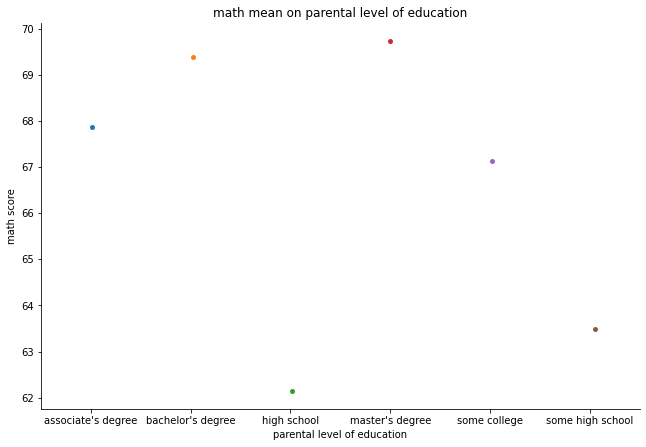

In [11]:
s = sns.catplot(x='parental level of education', y='math score', data=exam_mean)
s.fig.set_size_inches(10, 6)
plt.title("math mean on parental level of education")
plt.show()

In [12]:
exam_sum = mean_on_plofe.sum(axis=1).sort_values(ascending=False)
exam_sum

parental level of education
master's degree       220.796610
bachelor's degree     215.771186
associate's degree    208.707207
some college          205.429204
some high school      195.324022
high school           189.290816
dtype: float64

In [34]:
exam_df.groupby(by=['parental level of education']).count()['gender'].sort_values()

parental level of education
master's degree        59
bachelor's degree     118
some high school      179
high school           196
associate's degree    222
some college          226
Name: gender, dtype: int64

**학력별로 각 시험의 평균 점수를 구한 후에 세 개의 점수를 모두 더하여 학력순으로 나열**  
**평균 점수의 합이 높을수록 아이가 시험을 잘 본 것이다.**  

In [43]:
data = []
idx = []
for i, category in enumerate(exam_sum.index):
    data.append(exam_sum[i])
    idx.append(category)

exam_sum_df = pd.DataFrame({"parental level of education":idx, "sum": data})
exam_sum_df

,parental level of education,sum
0,master's degree,220.796610
1,bachelor's degree,215.771186
2,associate's degree,208.707207
3,some college,205.429204
4,some high school,195.324022
5,high school,189.290816


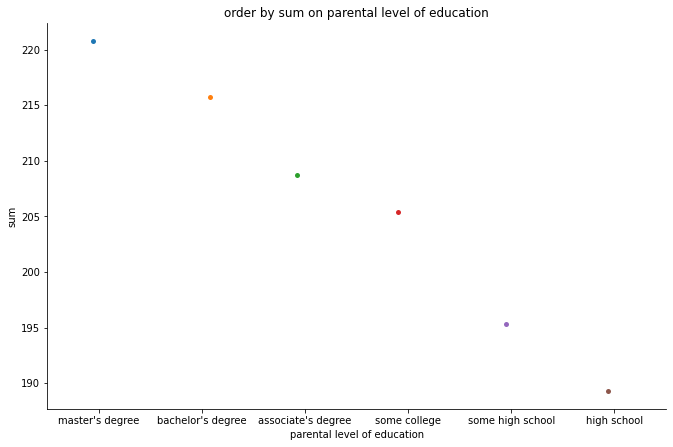

In [44]:
s = sns.catplot(x='parental level of education', y='sum', data=exam_sum_df)
s.fig.set_size_inches(10, 6)
plt.title("order by sum on parental level of education")
plt.show()